Data Project - Stock Market Analysis

Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    5.) What was the correlation between different stocks' daily returns?
    6.) How much value do we put at risk by investing in a particular stock?
    7.) How can we attempt to predict future stock behavior?

Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.


In [1]:
# For division
from __future__ import division

#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data as pdweb

# For time stamps
from datetime import datetime

Let's use Yahoo and pandas to grab some data for some tech stocks.

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = pdweb.get_data_yahoo(stock,start,end)

Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [3]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,194.953334,191.097857,192.961032,193.080159,3.155044e+07,191.927533
std,22.332309,22.364132,22.253646,22.355274,1.355273e+07,22.807266
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.505798
25%,175.967499,173.747501,174.872501,174.832497,2.178268e+07,173.452965
50%,199.055000,193.930000,196.434998,197.000000,2.790510e+07,195.877899
75%,209.260006,205.594994,207.717499,207.912502,3.707208e+07,206.560455
max,246.729996,242.880005,244.509995,246.580002,9.574460e+07,246.580002


In [4]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-10-25 to 2019-10-25
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

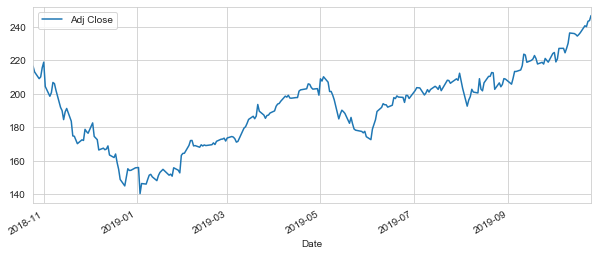

In [5]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

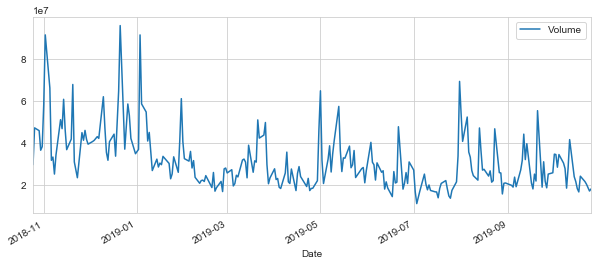

In [6]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [7]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

Now let's go ahead and plot all the additional Moving Averages

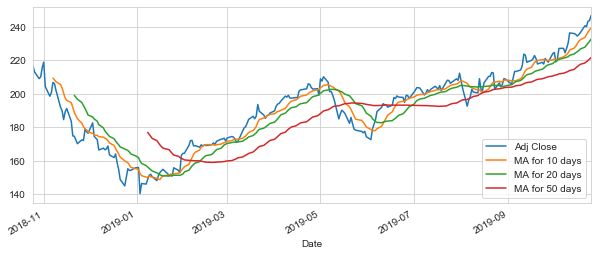

In [8]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [16]:
AAPL

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2018-10-25,221.380005,216.750000,217.710007,219.800003,29855800.0,216.441330,NaN,NaN,NaN,NaN
2018-10-26,220.190002,212.669998,215.899994,216.300003,47258400.0,212.994797,NaN,NaN,NaN,-0.015924
2018-10-29,219.690002,206.089996,219.190002,212.240005,45935500.0,208.996857,NaN,NaN,NaN,-0.018770
2018-10-30,215.179993,209.270004,211.149994,213.300003,36660000.0,210.040649,NaN,NaN,NaN,0.004994
2018-10-31,220.449997,216.619995,216.880005,218.860001,38358900.0,215.515686,NaN,NaN,NaN,0.026067
2018-11-01,222.360001,216.809998,219.050003,222.220001,58323200.0,218.824341,NaN,NaN,NaN,0.015352
2018-11-02,213.649994,205.429993,209.550003,207.479996,91328700.0,204.309570,NaN,NaN,NaN,-0.066331
2018-11-05,204.389999,198.169998,204.300003,201.589996,66163700.0,198.509583,NaN,NaN,NaN,-0.028388
2018-11-06,204.720001,201.690002,201.919998,203.770004,31882900.0,200.656265,NaN,NaN,NaN,0.010814


Section 2 - Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

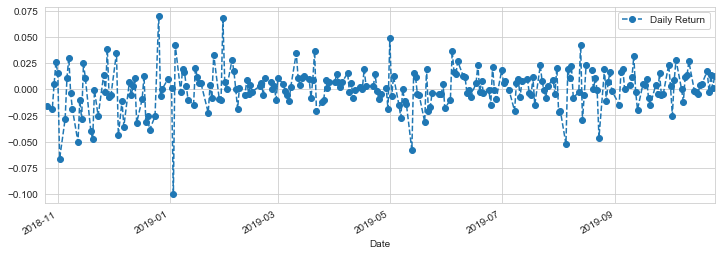

In [9]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

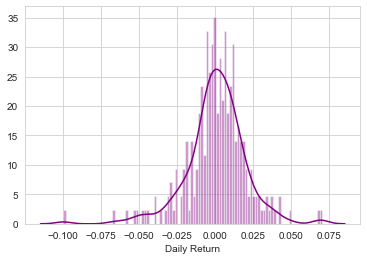

In [10]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist()

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame
#closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

closing_df = pdweb.get_data_yahoo(['AAPL','GOOG','MSFT','AMZN'],start,end)['Adj Close']